In [128]:
import pandas as pd
import re

# Comparativa de modelos

In [142]:
path = '/home/mr1142/Documents/Data/models/mascaras/validation_results/validation_results' + '' + '.csv'
df = pd.read_csv(path)

In [143]:
df['doble_loss'] = df['dice_coef_loss'] + df['loss_mask']

In [144]:
df.reset_index(drop = True)
index = [i for i in df.index if bool(re.search('comparacion', df['name'][i]))]

In [146]:
df = df.loc[index]

In [151]:
df['patologic'] = [1 if bool(re.search('patologic', df['name'][i])) else 0 for i in df.index]

In [152]:
df.sort_values('doble_loss')

,type,name,loss,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives,doble_loss,patologic
73,unet,comparacion_1,0.027100,0.026661,0.077886,0.978180,0.978374,71854.0,71143.0,0.104548,0
80,unet,patologic_comparacion_4,0.026244,0.026244,0.078352,0.979271,0.978564,111964.0,159738.0,0.104595,1
94,uloss,patologic_comparacion_3,0.106143,0.028961,0.077182,0.977206,0.977977,102447.0,196322.0,0.106143,1
96,uloss,patologic_comparacion_4,0.107596,0.028621,0.078975,0.977312,0.978957,129756.0,167622.0,0.107596,1
97,unet,comparacion_5,0.029030,0.028591,0.079203,0.976481,0.977642,96393.0,57738.0,0.107794,0
76,unet,patologic_comparacion_2,0.026814,0.026814,0.081001,0.978853,0.978568,104918.0,172255.0,0.107815,1
98,unet,patologic_comparacion_5,0.028347,0.028347,0.080317,0.977537,0.977796,158898.0,135525.0,0.108664,1
92,uloss,patologic_comparacion_2,0.109170,0.028944,0.080226,0.977202,0.978554,112884.0,185930.0,0.109170,1
77,unet,comparacion_3,0.029059,0.028470,0.080745,0.976631,0.976750,77299.0,75852.0,0.109214,0
79,unet,comparacion_4,0.029805,0.029209,0.080191,0.975901,0.976535,88364.0,69573.0,0.109400,0


In [154]:
df_normal = df[df.patologic == 0]
df_pato = df[df.patologic == 1]

In [137]:
df.columns

Index(['type', 'name', 'loss', 'dice_coef_loss', 'loss_mask', 'accuracy',
       'AUC', 'false_positives', 'false_negatives', 'doble_loss'],
      dtype='object')

# Results

## PLOT

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [184]:
df.columns

Index(['type', 'name', 'loss', 'dice_coef_loss', 'loss_mask', 'accuracy',
       'AUC', 'false_positives', 'false_negatives', 'doble_loss', 'patologic'],
      dtype='object')

In [213]:
y = 'doble_loss'
data = df
low_lim = np.percentile(data[y], 25)
high_lim = np.percentile(data[y], 75)
ir =  high_lim - low_lim

[(0.05, 0.6235608201473952)]

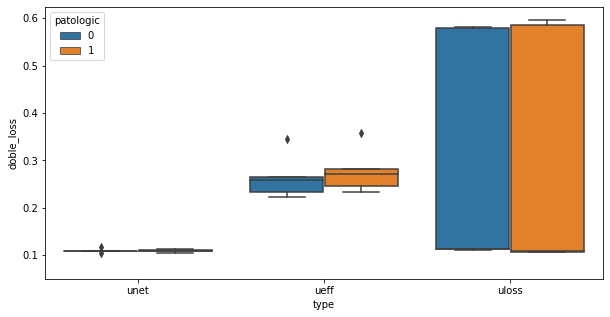

In [220]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="type", y=y, hue='patologic',
                data=data)
p.set(ylim=(0.05, high_lim+2.2*ir))

In [221]:
p.figure.savefig('paper_results/' + y + '.png')